# Inferential Statistics Practice
Using Python to apply inferential statistics concepts including sampling distributions, confidence intervals, hypothesis testing, etc.

## Confidence Intervals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

#coffee_full = pd.read_csv('../data/coffee_dataset.csv')
#coffee_red = coffee_full. sample (200)

In [2]:
df = pd.read_csv('coffee_dataset.csv')
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [3]:
df.shape

(2974, 4)

In [4]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200)
coffee_red

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


## Explore Dataset

In [5]:
coffee_red.head()
coffee_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2402 to 1422
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


#### Proportion of coffee drinkers in sample

In [6]:
mean_drinker = coffee_red['drinks_coffee'].mean()
mean_nondrinker = 1 - mean_drinker
print(mean_drinker)
print(mean_nondrinker)

0.595
0.405


#### Average height of coffee drinkers

In [7]:
drinks_height = coffee_red[coffee_red['drinks_coffee']]['height'].mean()
drinks_height

68.11962990858618

#### Average height of non-coffee drinkers

In [8]:
nondrinks_height = coffee_red[~coffee_red['drinks_coffee']]['height'].mean()
nondrinks_height

66.78492279927877

#### Bootstrap sample of 200 draws

In [9]:
bootsamp = coffee_red.sample(200,replace=True)
bootsamp['drinks_coffee'].mean()

0.605

#### Bootstrap sample 10,000 times 

(array([  16.,  106.,  590., 1831., 2989., 2644., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <BarContainer object of 10 artists>)

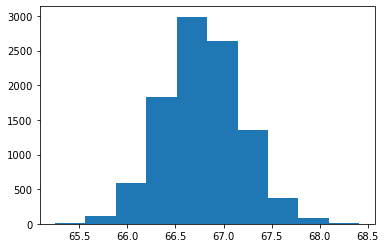

In [10]:
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200,replace=True)
    mean = bootsamp[bootsamp['drinks_coffee']==False]['height'].mean()
    boot_means.append(mean)
    
plt.hist(boot_means)

In [18]:
len(boot_means)

10000

#### Obtain 95% confidence interval

In [12]:
np.percentile(boot_means,2.5),np.percentile(boot_means,97.5)

(65.99291328157521, 67.58402738281573)

In [14]:
coffee_full[coffee_full['drinks_coffee']==False]['height'].mean()

66.44340776214703

   number
4       5
5       6
1       2
2       3
3       4
3       4


(array([1., 1., 1., 1., 0., 0., 1., 2., 1., 2.]),
 array([2.16666667, 2.43333333, 2.7       , 2.96666667, 3.23333333,
        3.5       , 3.76666667, 4.03333333, 4.3       , 4.56666667,
        4.83333333]),
 <BarContainer object of 10 artists>)

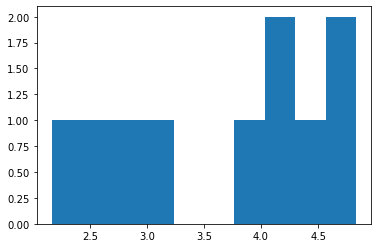

In [20]:
# Other example
dice = [1,2,3,4,5,6]
dices = pd.DataFrame({'number' : dice})
bootsamp2 = dices.sample(6, replace=True)
dice_mean=[]
print(bootsamp2)

for i in range(10):
    bootsamp2 = dices.sample(6, replace=True)
    mean = bootsamp2['number'].mean()
    dice_mean.append(mean)
    
plt.hist(dice_mean)